In [6]:
import networkx as nx
import matplotlib.pyplot as plt
from multiprocessing import Pool
import itertools
import community

In [7]:
#Exploratory Data Analysis
G_Komunitas = nx.read_edgelist("D:/Mata Kuliah S2 MTI/Database/Data Komunitas Komik Palembang.txt", create_using = nx.Graph(), nodetype = int)
#Quick snapshot of the Network
print (nx.info(G_Komunitas))

Name: 
Type: Graph
Number of nodes: 358
Number of edges: 357
Average degree:   1.9944


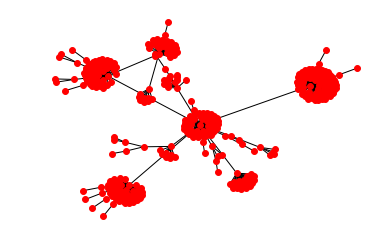

In [8]:
#Create network layout for visualizations
spring_pos = nx.spring_layout(G_Komunitas)
plt.axis("off")
nx.draw_networkx(G_Komunitas, pos = spring_pos, with_labels = False, node_size = 35)

In [9]:
#Parallel Betweenness Centrality
def partitions(nodes, n):
    "Partitions the nodes into n subsets"
    nodes_iter = iter(nodes)
    while True:
        partition = tuple(itertools.islice(nodes_iter,n))
        if not partition:
            return
        yield partition
        plt.show()
def btwn_pool(G_tuple):
    return nx.betweenness_centrality_source(*G_tuple)
def between_parallel(G, processes = None):
    p = Pool(processes=processes)
    part_generator = 4*len(p._pool)
    node_partitions = list(partitions(G.nodes(), int(len(G)/part_generator)))
    num_partitions = len(node_partitions)
    bet_map = p.map(btwn_pool,
                        zip([G]*num_partitions,
                        [True]*num_partitions,
                        [None]*num_partitions,
                        node_partitions))
    bt_c = bet_map[0]
    for bt in bet_map[1:]:
        for n in bt:
            bt_c[n] += bt[n]
    return bt_c

In [ ]:
if __name__ == '__main__':
    bt = between_parallel(G_Komunitas)
    top = 10

    max_nodes =  sorted(bt.items(), key = lambda v: -v[1])[:top]
    bt_values = [5]*len(G_Komunitas.nodes())
    bt_colors = [0]*len(G_Komunitas.nodes())
    for max_key, max_val in max_nodes:
        bt_values[max_key] = 150
        bt_colors[max_key] = 2
        plt.show()
    plt.axis("off")
    nx.draw_networkx(G_Komunitas, pos = spring_pos, cmap = plt.get_cmap("rainbow"), node_color = bt_colors, node_size = bt_values, with_labels = False)
    plt.show()

In [ ]:
 #Community Detection
    parts = community.best_partition(G_Komunitas)
    values = [parts.get(node) for node in G_Komunitas.nodes()]
    plt.axis("off")
    nx.draw_networkx(G_Komunitas, pos = spring_pos, cmap = plt.get_cmap("jet"), node_color = values, node_size = 35, with_labels = False)
    plt.show()